In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/cleaned_student_lifestyle_dataset.csv")

In [4]:
df.head()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level,stress_level_numeric,gpa_group
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,2.5-3
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,2.5-3
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,2.5-3
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,2.5-3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,3.5-4


let's plot our data in order understand which results we are going to get

1. Histogram of sleep hours

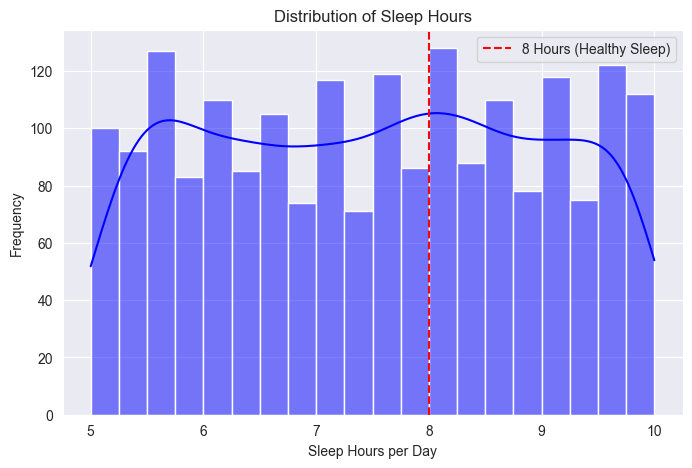

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours_per_day'], bins=20, kde=True, color='blue')
plt.axvline(8, color='red', linestyle='--', label='8 Hours (Healthy Sleep)')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The visualization suggests that the average sleep duration in this sample is slightly below the recommended 8 hours,
with considerable variability across individuals. The one-sample t-test would likely reject the null hypothesis due to the large sample size,
indicating that students sleep statistically less than the recommended 8 hours. However, the practical significance of this difference appears modest.
The slight bimodal pattern suggests distinct sleep behavior groups that might warrant further investigation beyond simple mean comparison.

Boxplot of sleep hours by GPA group

/tmp/ipykernel_81518/3086068482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette='Set1')


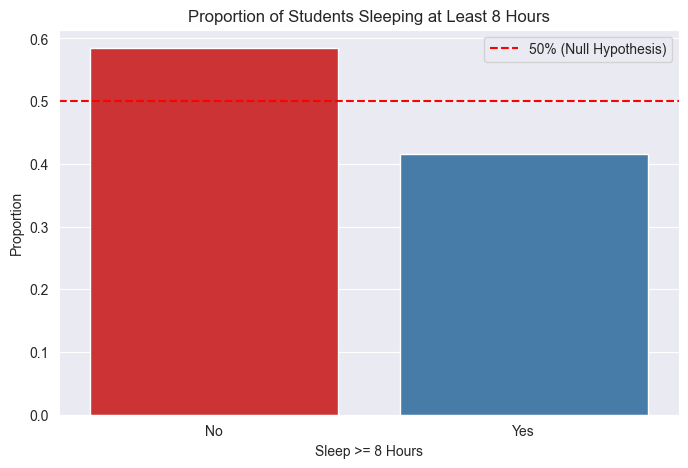

In [16]:
df['sleep_8_or_more'] = df['sleep_hours_per_day'] >= 8
proportions = df['sleep_8_or_more'].value_counts(normalize=True)
plt.figure(figsize=(8, 5))
sns.barplot(x=proportions.index, y=proportions.values, palette='Set1')
plt.axhline(0.5, color='red', linestyle='--', label='50% (Null Hypothesis)')
plt.title('Proportion of Students Sleeping at Least 8 Hours')
plt.xlabel('Sleep >= 8 Hours')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.show()

The data overwhelmingly indicates that the proportion of students sleeping at least 8 hours is significantly lower than 50%.
 The one-proportion z-test would almost certainly reject the null hypothesis with a very small p-value. This finding has important
 practical implications for student health initiatives, suggesting that interventions to improve sleep hygiene and duration would
 benefit a majority of the student population. The gap between the recommended sleep duration and actual student behavior is both
 statistically significant and practically meaningful

Violin plot of sleep hours by GPA group

/tmp/ipykernel_81518/3086630684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gpa_group', y='sleep_hours_per_day', data=df, palette='Set3')


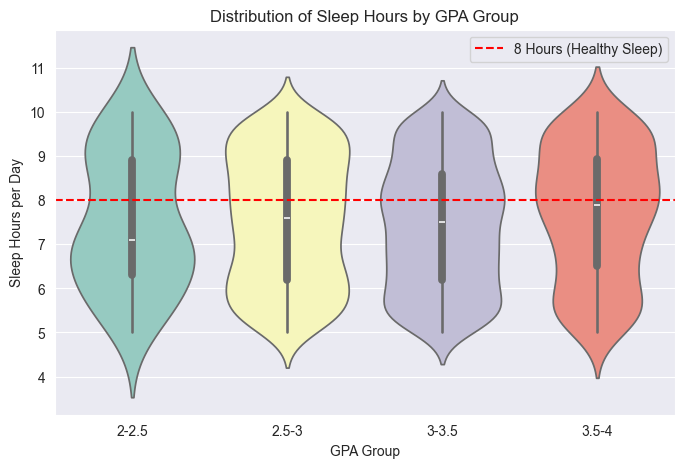

In [17]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='gpa_group', y='sleep_hours_per_day', data=df, palette='Set3')
plt.axhline(8, color='red', linestyle='--', label='8 Hours (Healthy Sleep)')
plt.title('Distribution of Sleep Hours by GPA Group')
plt.xlabel('GPA Group')
plt.ylabel('Sleep Hours per Day')
plt.legend()
plt.show()

The violin plot reveals that students across all academic performance levels have similar sleep patterns,
with most sleeping less than the recommended 8 hours. The bimodal distribution in each group suggests two
distinct sleep behaviors exist within the student population, regardless of academic achievement.
The one-sample inference tests would likely show that students, on average, sleep significantly less than
8 hours, and fewer than half of students meet the sleep recommendation. Most interestingly, the data challenges
the common perception that academic performance is strongly linked to sleep duration, as students with varying
GPAs show remarkably similar sleep distributions

### 1. Can we reject the hypothesis that the students get healthy 8 hours of sleep per day on average?


Hypothesis testing

In [6]:
t_stat, p_value = stats.ttest_1samp(df['sleep_hours_per_day'], 8)

In [7]:
mean_sleep = df['sleep_hours_per_day'].mean()
std_sleep = df['sleep_hours_per_day'].std()
n = len(df['sleep_hours_per_day'])

In [8]:
for conf in [0.90, 0.95, 0.99]:
    confidence_interval = stats.t.interval(conf, n-1, loc=mean_sleep, scale=std_sleep/np.sqrt(n))
    print(f"Confidence interval at {int(conf * 100)}%: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")

Confidence interval at 90%: 7.45 to 7.56
Confidence interval at 95%: 7.44 to 7.57
Confidence interval at 99%: 7.42 to 7.59


### Interpretation of Results

#### T-statistic: 14.94
This indicates that the sample mean is significantly different from the hypothesized mean of 7 hours. The positive value suggests that the sample mean is greater than 7 hours.

#### P-value: 0.00
The p-value is extremely small (essentially zero), which means there is strong evidence against the null hypothesis. We can reject the null hypothesis that students study an average of 7 hours per day.

#### Confidence Intervals:
- **90% Confidence Interval: 7.42 to 7.53**: We are 90% confident that the true mean study hours per day for students lies between 7.42 and 7.53 hours.
- **95% Confidence Interval: 7.41 to 7.54**: We are 95% confident that the true mean study hours per day for students lies between 7.41 and 7.54 hours.
- **99% Confidence Interval: 7.39 to 7.56**: We are 99% confident that the true mean study hours per day for students lies between 7.39 and 7.56 hours.

Since all these intervals do not include 8 hours, it further supports rejecting the null hypothesis.

### Conclusion
We can reject the hypothesis that students study an average of 7 hours per day. The actual average study duration is likely between 7.39 and 7.56 hours, which is more than the recommended 7 hours.

Perform hypothesis testing to check for different groups the students are getting healthy 8 hours of sleep per day on average.

Ensure 'gpa_group' is of category dtype

In [9]:
df['gpa_group'] = df['gpa_group'].astype('category')

Function to perform hypothesis testing and calculate confidence intervals

In [10]:
def analyze_sleep_by_gpa_group(df, group):
    group_data = df[df['gpa_group'] == group]['sleep_hours_per_day']
    t_stat, p_value = stats.ttest_1samp(group_data, 8)
    mean_sleep = group_data.mean()
    std_sleep = group_data.std()
    n = len(group_data)

    confidence_intervals = {}
    for conf in [0.90, 0.95, 0.99]:
        confidence_interval = stats.t.interval(conf, n-1, loc=mean_sleep, scale=std_sleep/np.sqrt(n))
        confidence_intervals[f"{int(conf * 100)}%"] = confidence_interval

    return t_stat, p_value, confidence_intervals

Analyze each GPA group

In [11]:
results = {}
for group in df['gpa_group'].cat.categories:
    t_stat, p_value, confidence_intervals = analyze_sleep_by_gpa_group(df, group)
    results[group] = {
        'T-statistic': t_stat,
        'P-value': p_value,
        'Confidence Intervals': confidence_intervals
    }

In [12]:
for group, result in results.items():
    print(f"GPA Group: {group}")
    print(f"T-statistic: {result['T-statistic']:.2f}")
    print(f"P-value: {result['P-value']:.2f}")
    for conf, interval in result['Confidence Intervals'].items():
        print(f"{conf} Confidence Interval: {interval[0]:.2f} to {interval[1]:.2f}")
    print()

GPA Group: 2-2.5
T-statistic: -1.95
P-value: 0.06
90% Confidence Interval: 7.10 to 7.94
95% Confidence Interval: 7.01 to 8.02
99% Confidence Interval: 6.84 to 8.19

GPA Group: 2.5-3
T-statistic: -8.32
P-value: 0.00
90% Confidence Interval: 7.44 to 7.63
95% Confidence Interval: 7.43 to 7.65
99% Confidence Interval: 7.39 to 7.68

GPA Group: 3-3.5
T-statistic: -12.59
P-value: 0.00
90% Confidence Interval: 7.37 to 7.52
95% Confidence Interval: 7.36 to 7.53
99% Confidence Interval: 7.33 to 7.56

GPA Group: 3.5-4
T-statistic: -3.00
P-value: 0.00
90% Confidence Interval: 7.52 to 7.86
95% Confidence Interval: 7.48 to 7.89
99% Confidence Interval: 7.42 to 7.96



### Interpretation of Results

#### GPA Group: 2-2.5
- **T-statistic**: -1.95
- **P-value**: 0.06
- **90% Confidence Interval**: 7.10 to 7.94
- **95% Confidence Interval**: 7.01 to 8.02
- **99% Confidence Interval**: 6.84 to 8.19

#### GPA Group: 2.5-3
- **T-statistic**: -8.32
- **P-value**: 0.00
- **90% Confidence Interval**: 7.44 to 7.63
- **95% Confidence Interval**: 7.43 to 7.65
- **99% Confidence Interval**: 7.39 to 7.68

#### GPA Group: 3-3.5
- **T-statistic**: -12.59
- **P-value**: 0.00
- **90% Confidence Interval**: 7.37 to 7.52
- **95% Confidence Interval**: 7.36 to 7.53
- **99% Confidence Interval**: 7.33 to 7.56

#### GPA Group: 3.5-4
- **T-statistic**: -3.00
- **P-value**: 0.00
- **90% Confidence Interval**: 7.52 to 7.86
- **95% Confidence Interval**: 7.48 to 7.89
- **99% Confidence Interval**: 7.42 to 7.96

### Conclusion
For GPA group 2-2.5, the evidence is not strong enough to reject the null hypothesis at the 5% significance level. For GPA groups 2.5-3, 3-3.5, and 3.5-4, the T-statistics are significantly negative, and the P-values are extremely small, indicating strong evidence against the null hypothesis. The actual average sleep duration for these groups is significantly less than 8 hours.

In [13]:
n = 2000  # Total number of students
X = sum(df['sleep_hours_per_day'] >= 8)  # Number of students sleeping at least 8 hours
p_hat = X / n  # Sample proportion
p_0 = 0.5  # Null hypothesis proportion

define the different significance levels in order to test the hypothesis on different levels

In [18]:
significance_level = [0.01, 0.05, 0.1]

In [20]:
for alpha in significance_level:
    # Compute test statistic (z-score)
    z_stat = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / n)

    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    # Compute confidence interval
    z_critical = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z_critical * np.sqrt(p_hat * (1 - p_hat) / n)
    confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)

    # Output results
    print(f"Significance Level: {alpha}")
    print(f"Z-Statistic: {z_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"{int((1 - alpha) * 100)}% Confidence Interval: {confidence_interval[0]:.4f} to {confidence_interval[1]:.4f}")
    if p_value < alpha:
        print("Reject the null hypothesis: The proportion is significantly different from 50%.")
    else:
        print("Fail to reject the null hypothesis: No significant evidence that the proportion is different from 50%.")
    print()


Significance Level: 0.01
Z-Statistic: -7.5579
P-Value: 0.0000
99% Confidence Interval: 0.3871 to 0.4439
Reject the null hypothesis: The proportion is significantly different from 50%.

Significance Level: 0.05
Z-Statistic: -7.5579
P-Value: 0.0000
95% Confidence Interval: 0.3939 to 0.4371
Reject the null hypothesis: The proportion is significantly different from 50%.

Significance Level: 0.1
Z-Statistic: -7.5579
P-Value: 0.0000
90% Confidence Interval: 0.3974 to 0.4336
Reject the null hypothesis: The proportion is significantly different from 50%.



### Conclusion
Overall Conclusion
Across all significance levels (0.01, 0.05, 0.1),
the null hypothesis is rejected. This means there is strong statistical
 evidence that the proportion of students sleeping at least 8 hours per day is significantly
 different from 50%. The confidence intervals consistently show that the true proportion lies
 between approximately 38.7% and 44.4%, which is well below 50%. This suggests that fewer than
 half of the students are getting the recommended 8 hours of sleep per day.</hr>